In [1]:
#----------------------------
# AUTHORS:  D. Alex Hughes, Micah GR
# PURPOSE:  Analysis of voting experiment with 1st generation immigrants
# DATA IN:  'analysisData.Rdata'
# DATA OUT: 
# DATE BEGAN: Rocktober 2014
#----------------------------

rm(list = ls())

##
## Load Packages
##

library(stargazer)
library(data.table) # 1.10.0
library(ggplot2)
library(magrittr)

sem <- function(x) {
    X <- na.omit(x)
    sqrt(var(X)/length(X))
}

##
## check wd:
##

setwd("~/Dropbox/1-Projects/Alex-Micah/San Diego Experiment/Current Version/")
getwd()


##
## Load Data
##
load('./data/analysisData.Rdata')


Please cite as: 

 Hlavac, Marek (2015). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2. http://CRAN.R-project.org/package=stargazer 



[1] "/Users/douglashughes/Dropbox/1-Projects/Alex-Micah/San Diego Experiment/Current Version"

# Rosrio's Questions 
Rosario had some thoughts about how to look through the data, and ways to check for whether the data supports these theories. Here, I'm summarizing, as best as I can, these thoughts into two statements: 

1. Is there a conditional effect on *estimate of candidate ideology* that is conditional on time? 
2. Is there a conditional effect on *candidate ideology* that is different for people who voted for the missing candidate and those who did not. 

Are these close to what you had anticipated, Rosario? 

To estimate these, we need to: 

- Create data that calculates the difference between the self-assessed ideology and the candidate assessed ideology 
- But, this is going to not include ideology estimates that are greater than 7. Estimates reported as 8 are "I don't think in these terms", and 998 and 999 were "I don't want to answer this question" and "NA". 

In [2]:
 DT <- DT[ideology < 8 & gonzideol < 8, ideol_diff := ideology - gonzideol]

## Conditional Effect on Estimate of Candidate Ideology, based on Time in US 
Are individuals who have lived in the United States for longer periods of time *differentially* responding to the treatment that we are showing them? That is, when we show a mestizo candidate to someone who has lived in the United State for 0 years, are they assessing the ideology of this candidate differnetly than if we had shown a mestizo candidate to someone who has lived in the United States for 20 years. 

We build these models in a few steps: 

- We estimate null models that include only the treatment, then only the years in US, then both, then the interaction.
- In all models, we can or cannot include the stanrdad set of covaraites that we are including in these models; the results don't change. 

In [3]:
model_1 <- DT[gonzideol < 8, lm(gonzideol ~ factor(conditions) + age + sex + educ )]
model_2 <- DT[gonzideol < 8, lm(gonzideol ~ yearsinus + age + sex + educ)]
model_3 <- DT[gonzideol < 8 , lm(gonzideol ~ yearsinus + factor(conditions) + age + sex + educ )]
model_4 <- DT[gonzideol < 8 , lm(gonzideol ~ yearsinus * factor(conditions) + age + sex + educ )]

In [7]:
stargazer(model_1, model_2, model_3, model_4, type = "text",  
         covariate.labels = c("White Candidate", "Mestizo Candidate", "Indegeneous Candidate", 
                              "Years in US", "Age", "Sex", "Education", 
                              "Years in US * White Candidate", "Years in US * Mestizo Candidate", 
                              "Years in US * Indegeneous Candidate"), 
          omit.stat = "all"
         )


                                            Dependent variable:        
                                    -----------------------------------
                                                 gonzideol             
                                      (1)      (2)      (3)      (4)   
-----------------------------------------------------------------------
White Candidate                     0.984**           0.942**   1.057  
                                    (0.416)           (0.414)  (1.002) 
                                                                       
Mestizo Candidate                   1.169***          1.313***  0.757  
                                    (0.430)           (0.432)  (0.938) 
                                                                       
Indegeneous Candidate                0.441             0.424    0.238  
                                    (0.393)           (0.389)  (0.852) 
                                                               

## Conditional Effect on Estimate of Ideological Proximity 
Is one's assessment of the ideological proximity *different* for experimental candidates that received a vote than for experimental candidates that did not receive a vote? This is an interesting thought, but Alex is having a hard time making sure that this is a *causal* statement, or if it isn't, then what it is that we *are* able to say. 

As well, is there a clear expectation for the direction of the change in candidate- and self-ascribed ideology? I think that this could potentially go both ways, depending on whether an individual thinks of him-self or her-self as being right-of-center or left-of-center. There is probably a way to construct this data, but as a first cut, we can think about looking at whether the variance of the ideology difference is the same in the group of people that voted for the experimental candidate vs. those who voted for the non-experimental candidate. d

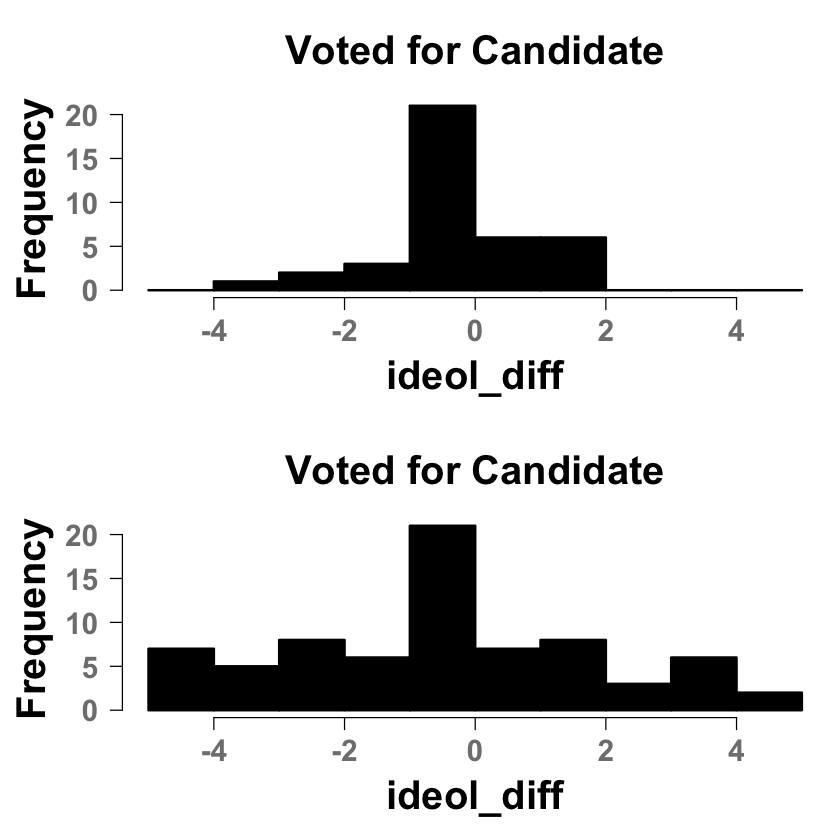

In [5]:
source("http://ischool.berkeley.edu/~d.alex.hughes/code/pubPlot.R")
par(mfrow = c(2,1))
h <- capture.output(
    DT[ideology < 8 & gonzideol < 8 & votecanmiss == 1, 
   hist(ideol_diff, xlim = c(-5, 5), breaks = -5:5, 
        col = "black", main = "Voted for Candidate")]
    )
h <- capture.output(
    DT[ideology < 8 & gonzideol < 8 & votecanmiss == 0, 
   hist(ideol_diff, xlim = c(-5, 5), breaks = -5:5, 
        col = "black", main = "Voted for Candidate")]
    )

We can pretty clearly look at this at see that there isn't a mean shift, but that there is a noticable variance shift. People who did not vote for the experimental candidate may have thought that the experimental candidate was quite different from them, ideologically. 

A quick test for this is to look into a `t.test` for difference in location, and an `f.test` for difference in dispersion. 

In [6]:
DT[ideology < 8 & gonzideol < 8, t.test(ideol_diff ~ votecanmiss)]
DT[ideology < 8 & gonzideol < 8, var.test(ideol_diff ~ votecanmiss)]


	Welch Two Sample t-test

data:  ideol_diff by votecanmiss
t = -0.614, df = 109, p-value = 0.54
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.86779  0.45753
sample estimates:
mean in group 0 mean in group 1 
        0.00000         0.20513 



	F test to compare two variances

data:  ideol_diff by votecanmiss
F = 4.54, num df = 72, denom df = 38, p-value = 2.1e-06
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 2.5235 7.7751
sample estimates:
ratio of variances 
            4.5401 
